In [211]:
# Python 3.9.0
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from conversation_data.csv
df = pd.read_csv('conversation_data.csv')
df.head()

,conversation_id,conversation_type,user_id,user_email,usage_frequency,support_agent_id,started_at,closed_at,company_id,company_name,subscription_id,subscription_type,score_id,created_at,score
0,343c8f4e-4308-484c-8cdd-13e79af6a0a6,sales inquiry,740,sandersronald@example.com,8,1362,2023-07-09 20:39:16,2023-07-11 23:39:16,9,Dean-Flores,fbb49278-7ed0-4499-aa13-232c1caca68a,free,a95e5ef0-14c4-4912-bacf-8e13b088c4e5,2023-07-09 20:39:16,2
1,1698cdac-923b-49ca-8bd2-99db84310783,technical support,635,james89@example.net,5,1852,2023-06-05 23:01:47,2023-06-06 11:01:47,10,Santiago-Madden,df207384-27bd-4959-bcfe-bec180a575ea,enterprise,34f4af00-c64a-41ae-95d0-41a233dd2706,2023-06-05 23:01:47,4
2,1d37c5c7-59d9-4fe9-bddc-5063373af727,sales inquiry,645,lopezanne@example.com,2,1844,2023-05-20 21:45:19,2023-05-21 04:45:19,19,Jones Ltd,269396ef-d55a-4bc2-8878-09a22f36aa06,self-serve,399b4525-5151-47b0-baa0-9d523dab0325,2023-05-20 21:45:19,5
3,ce7c038c-843a-4d83-b67b-726f412fae86,sales inquiry,864,danielperez@example.net,32,1712,2023-03-24 16:20:04,2023-03-27 14:20:04,36,Jones-Garcia,5da63bc6-7dc7-4201-b6af-ffd9ff29c066,free,7e13ee47-09d2-461b-a47d-5111a50f02ba,2023-03-24 16:20:04,4
4,da102517-8f1e-480e-b6a0-6e0a257f7af8,technical support,806,qwest@example.com,79,1098,2023-07-23 12:22:22,2023-07-25 22:22:22,23,Armstrong-Davis,1bb912d2-9677-49bf-86e3-d76c4a55d7b8,free,b72fc282-c0ee-4bee-9373-a23d94be606a,2023-07-23 12:22:22,4


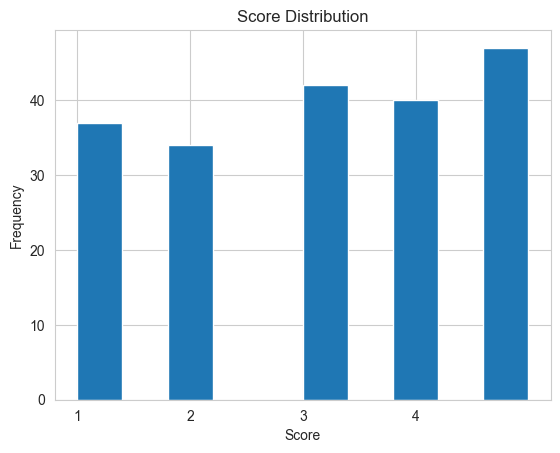

In [224]:
# Create a bar chart using column score from the dataframe
plt.hist(df['score'], bins=10)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, 5, 1))
plt.show()

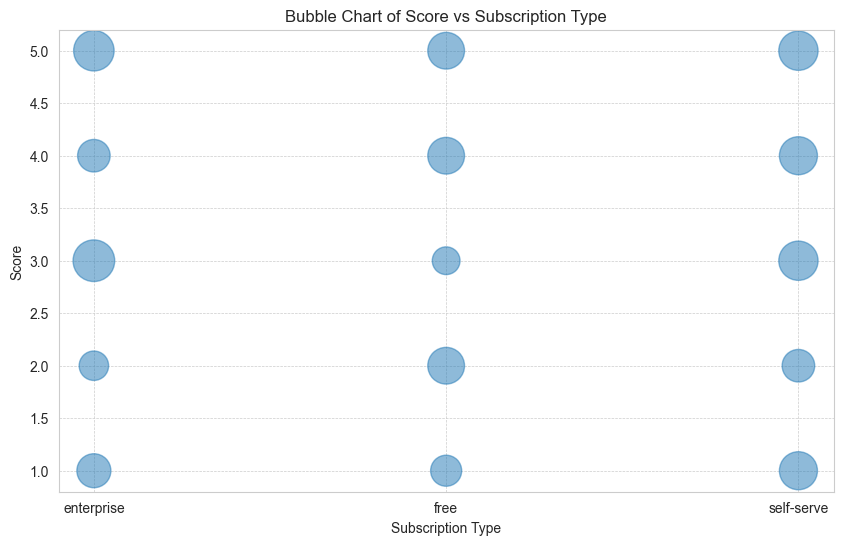

In [226]:
# Create bubble chart with score on the y axis subscruption_type on the x axis and number of users as the size of the bubble using the dataframe
grouped_df = df.groupby(['subscription_type', 'score']).size().reset_index(name='number_of_users')
grouped_df.head()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bubble chart
plt.scatter(grouped_df['subscription_type'], grouped_df['score'], s=grouped_df['number_of_users']*50, alpha=0.5)

plt.xlabel('Subscription Type')
plt.ylabel('Score')
plt.title('Bubble Chart of Score vs Subscription Type')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


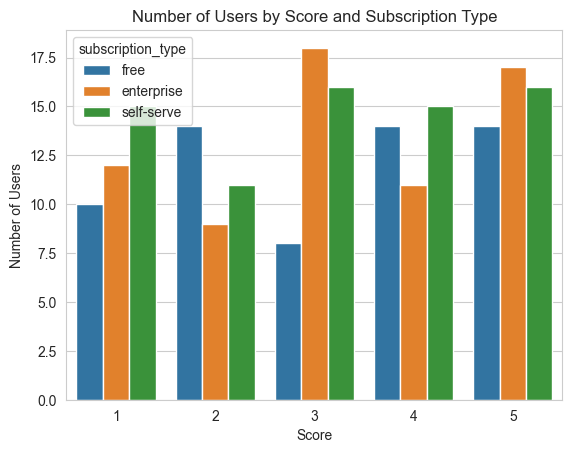

In [214]:
# Create a grouped bar chart with the score on the x axis and the number of users on the y axis grouped by the subscription type
sns.countplot(data = df, x = 'score', hue = 'subscription_type')
plt.xlabel('Score')
plt.ylabel('Number of Users')
plt.title('Number of Users by Score and Subscription Type');


<AxesSubplot: ylabel='company_name'>

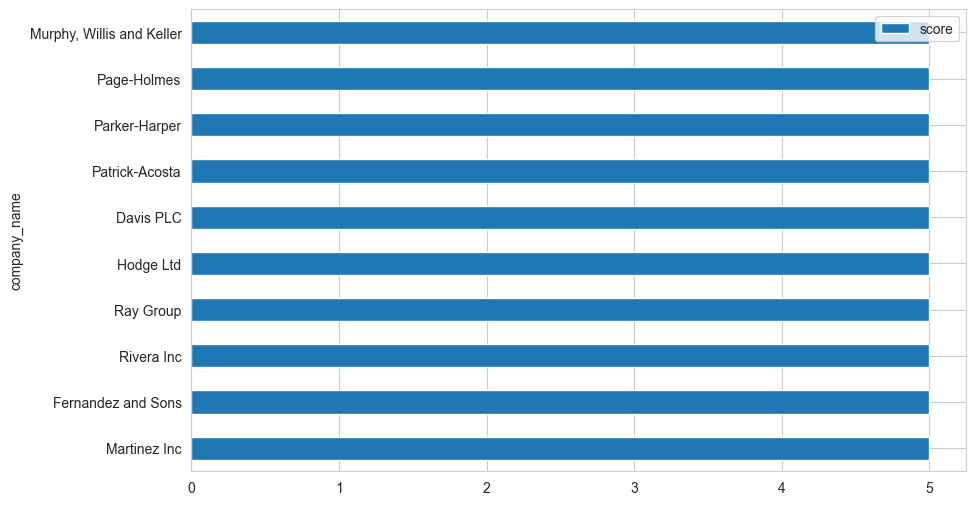

In [227]:
# Create a vertical bar chart with companies on the y axis and their average score on the x axis from the dataframe
# create a new datafroame grouping the companies and calculating the average score for each company
company_score = pd.DataFrame(df.groupby('company_name')['score'].mean())
company_score = company_score.sort_values(by='score', ascending=False)
company_score.head(10).plot(kind='barh', figsize=(10, 6))

<AxesSubplot: ylabel='support_agent_id'>

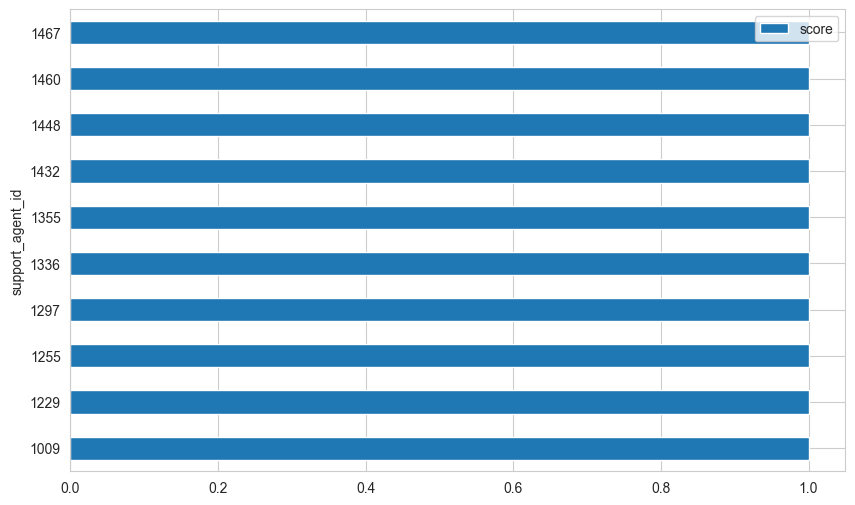

In [228]:
# Create a bar chart based on the average score for each support agent
# Group df by support agent and calculate average score
agent_score_group = pd.DataFrame(df.groupby('support_agent_id')['score'].mean())
# Order it descendingly by score
agent_score_group = agent_score_group.sort_values(by='score', ascending=True)
agent_score_group.head()
# Create a vertical bar chart 
agent_score_group.head(10).plot(kind='barh', figsize=(10, 6))

/var/folders/q5/129jvbqn7697cxyglg65t6gr0000gn/T/ipykernel_9154/3671080088.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agent_duration_group = df.groupby('support_agent_id').mean().reset_index()


<AxesSubplot: ylabel='support_agent_id'>

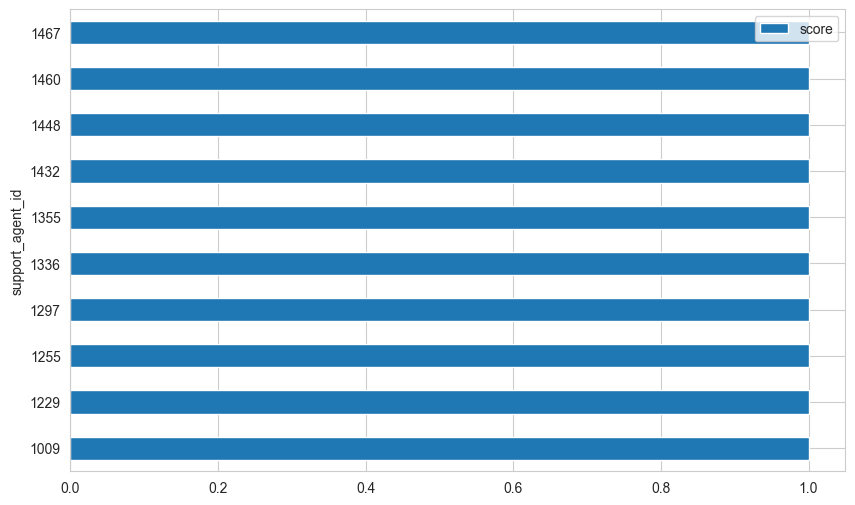

In [229]:
# Convert the started_at and closed_at column to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['duration'] = df['closed_at'] - df['started_at']
# Convert the duration column to hours
df['duration'] = df['duration'].astype('timedelta64[h]')

# Group the dataframe by support_agent_id and calculate the mean of the duration column
agent_duration_group = df.groupby('support_agent_id').mean().reset_index()
# Sort the dataframe by the duration column
agent_duration_group = agent_duration_group.sort_values(by='duration', ascending=True).reset_index(drop=True)

agent_score_group.head(10).plot(kind='barh', figsize=(10, 6))

Text(0, 0.5, 'Average Score')

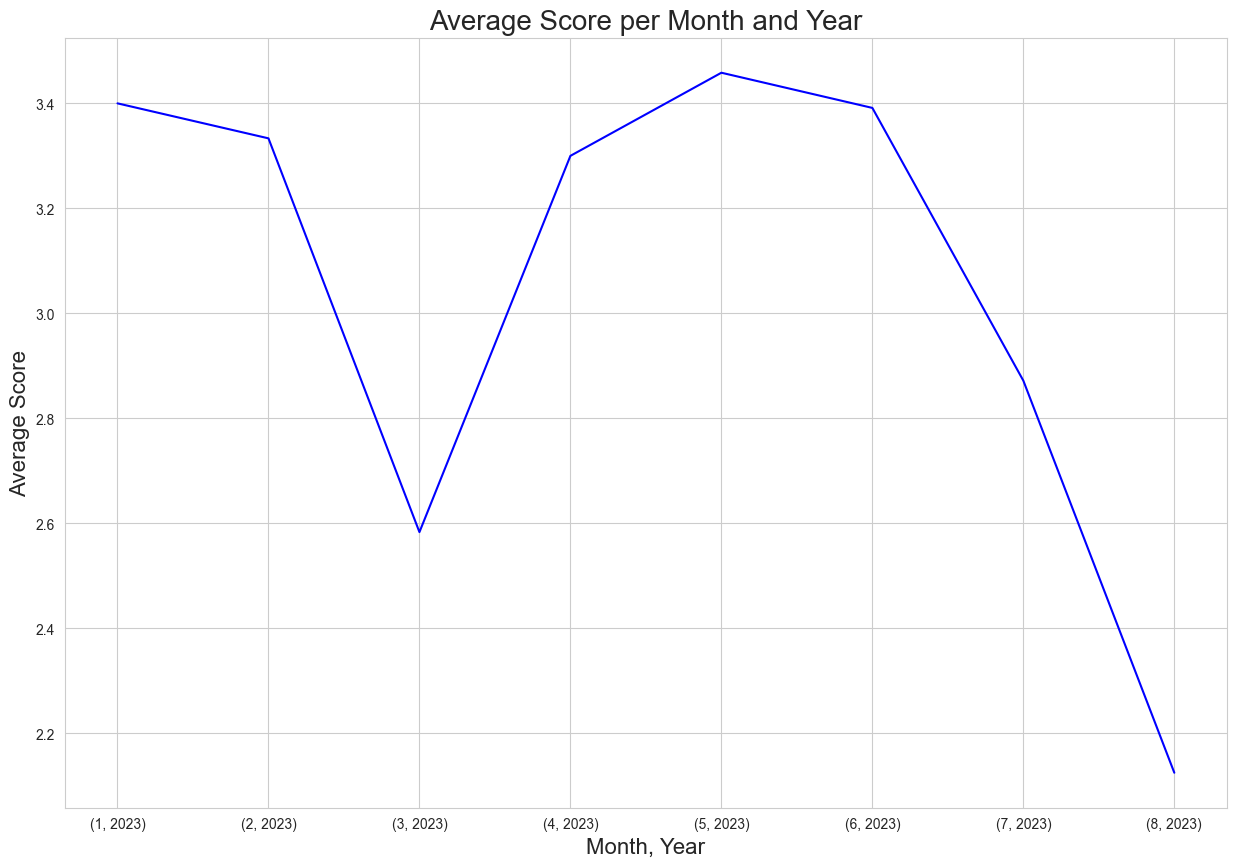

In [221]:
# group the created_at column by month and year
df['created_at'] = pd.to_datetime(df['created_at'])
df['month'] = df['created_at'].dt.month
df['year'] = df['created_at'].dt.year
df.head()

# group the created_at column by month and year and average the score column
date_score_group = df.groupby(['month', 'year'])['score'].mean()

# plot the average score per month and year
date_score_group.plot(kind='line', figsize=(15, 10), color='blue')
plt.title('Average Score per Month and Year', fontsize=20)
plt.xlabel('Month, Year', fontsize=16)
plt.ylabel('Average Score', fontsize=16)

<AxesSubplot: title={'center': 'Average Score by Subscription Type'}, ylabel='subscription_type'>

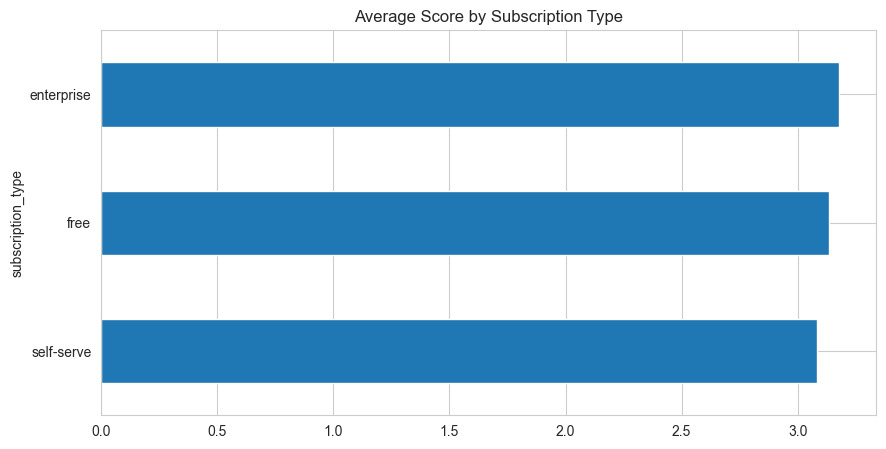

In [219]:
sub_score_group = df.groupby(['subscription_type'])['score'].mean()
sub_score_group = sub_score_group.sort_values(ascending=True)
sub_score_group.plot(kind='barh', figsize=(10,5), title='Average Score by Subscription Type')

Text(0, 0.5, 'Average Duration of Calls')

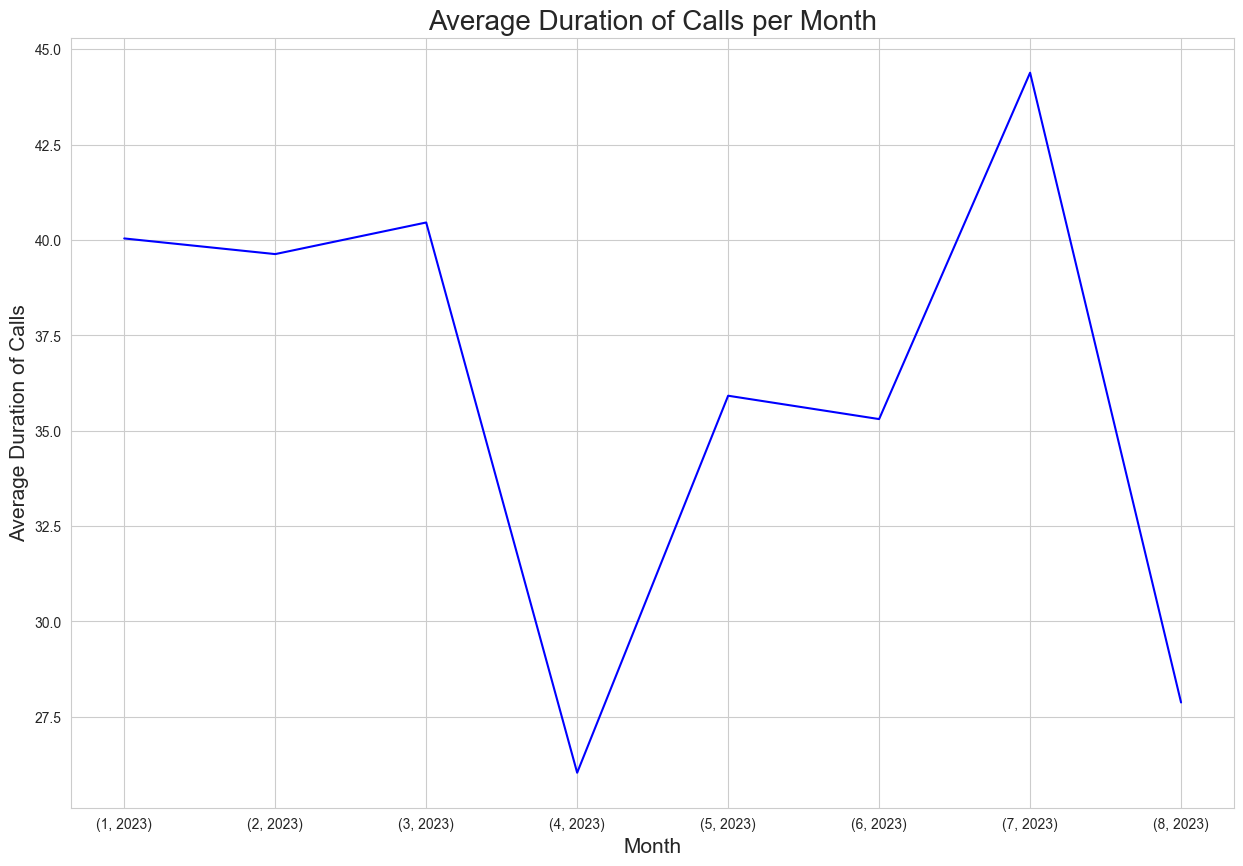

In [222]:
con_dur_group = df.groupby(['month', 'year'])['duration'].mean()
con_dur_group.plot(kind='line', figsize=(15, 10), color='blue')
plt.title('Average Duration of Calls per Month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Average Duration of Calls', fontsize=15)

<AxesSubplot: title={'center': 'Average Score by Conversation Type'}, ylabel='conversation_type'>

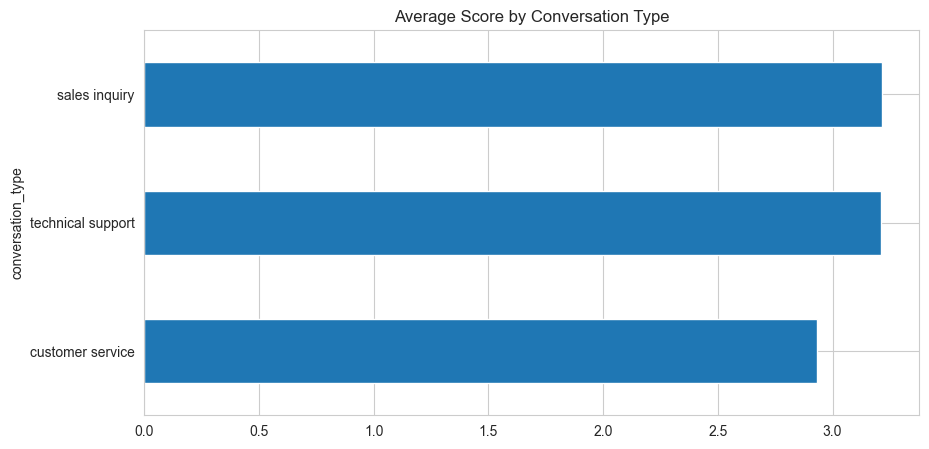

In [223]:
conv_score_group = df.groupby(['conversation_type'])['score'].mean()
conv_score_group = conv_score_group.sort_values(ascending=True)
conv_score_group.plot(kind='barh', figsize=(10,5), title='Average Score by Conversation Type')